## Churn_Data

In [1]:
# import necesarry libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Observation
1. There is no NA Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# I have drop the unused data

In [9]:
data.drop('customerID',axis=1,inplace=True)

In [10]:
data.shape

(7043, 20)

In [11]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
# Observation
# 1.Target variable has imbalanced class distribution. 
# 2.Positive class (Churn=Yes) is much less than negative class (churn=No)
# 3.We will use upsampling or downsampling to overcome this issue.

In [13]:
# Discover the features that only have two values.
columns = data.columns
Binary_column=[]
for col in columns:
    if data[col].value_counts().shape[0]==2:
        Binary_column.append(col)
        

In [14]:
Binary_column

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

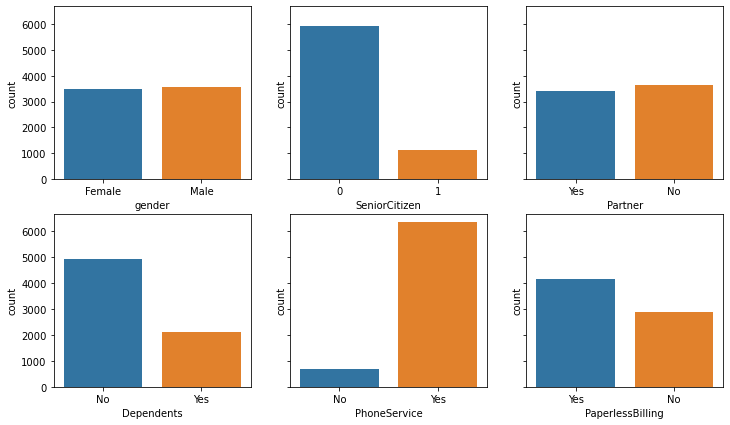

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=data, ax=axes[0,1])
sns.countplot("Partner", data=data, ax=axes[0,2])
sns.countplot("Dependents", data=data, ax=axes[1,0])
sns.countplot("PhoneService", data=data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=data, ax=axes[1,2])

In [16]:
# observation:
# 1.There is a high imbalance in SeniorCitizen and PhoneService variables.

In [17]:
# we need to change the values of target variable. “Yes” will be 1 and “No” will be 0
churn_numeric={"Yes":1,"No":0}
data.Churn.replace(churn_numeric,inplace=True)

In [18]:
data[["gender","Churn"]].groupby(["gender"]).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [19]:
# Average churn rate for males and females are approximately the same 
# which indicates gender variable does not bring a valuable prediction power to a model

In [20]:
table = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


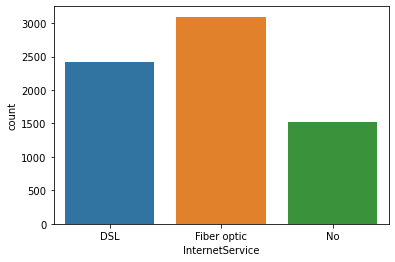

In [21]:
# Internet service variable is definitely important in predicting churn rate.
sns.countplot( "InternetService",data=data)

In [22]:
data[["InternetService","Churn"]].groupby("InternetService").mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [23]:
data[["InternetService","MonthlyCharges"]].groupby("InternetService").mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [24]:
# observation:
# 1.Fiber optic service is much more expensive than DSL 
# 2.which may be one of the reasons why customers churn

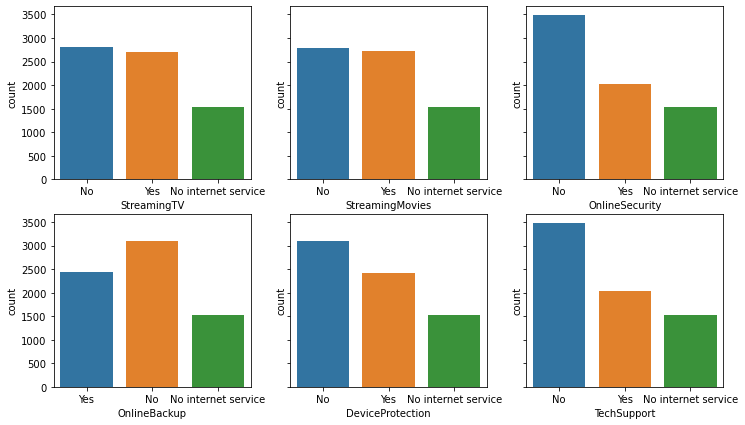

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=data, ax=axes[0,0])
sns.countplot("StreamingMovies", data=data, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=data, ax=axes[0,2])
sns.countplot("OnlineBackup", data=data, ax=axes[1,0])
sns.countplot("DeviceProtection", data=data, ax=axes[1,1])
sns.countplot("TechSupport", data=data, ax=axes[1,2])

In [26]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [27]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [28]:
data[['MultipleLines',"Churn"]].groupby(["MultipleLines"]).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [29]:
# obsevation;
# It is similar to StreamingTV and StreamingMovies variables 
# so it is up to you to take advantage of these variables in the model

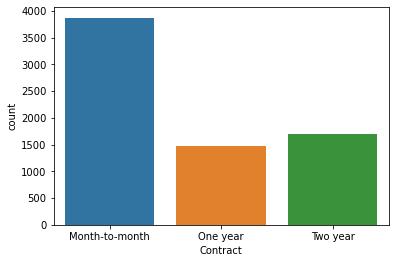

In [30]:
sns.countplot('Contract',data=data)

In [31]:
data[['Contract',"Churn"]].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [32]:
# observatio:
# It seems like, as expected, customers with short-term contract are more likely to churn

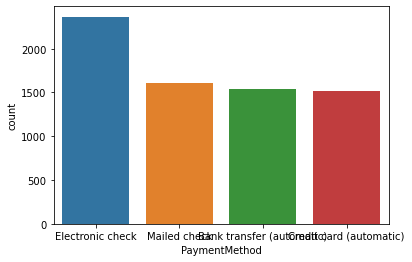

In [33]:
sns.countplot('PaymentMethod',data=data)

In [34]:
# observation:
# Customers who pay with electronic check are more likely to churn

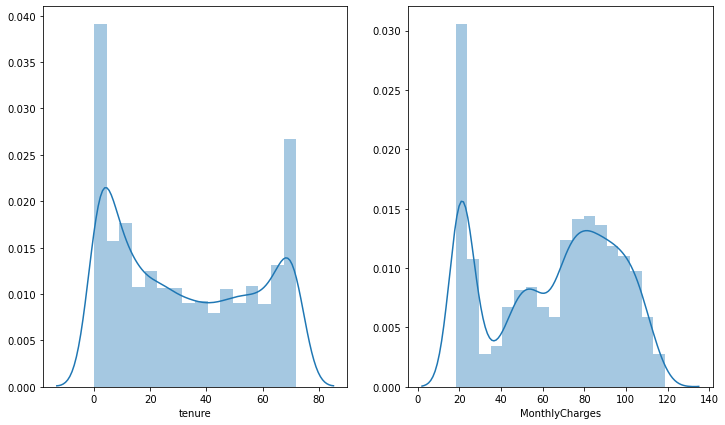

In [35]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(data["tenure"], ax=axes[0])
sns.distplot(data["MonthlyCharges"], ax=axes[1])

In [36]:
# observation:
# most of the customers are either pretty new or have stayed for a long time with the company. 
# Our goal should be finding a way to keep those customers with a tenure of up to a few months.


In [37]:
data[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [38]:
data[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


## Observation
After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:
1.Customer ID
2.Gender
3.PhoneService
4.Contract
5.TotalCharges

In [39]:
data.drop(['gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)

In [40]:
x=data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']]

In [41]:
x_cat_cols=x.select_dtypes(include='object')
x_num_clos=x.select_dtypes(include='number')

In [42]:
# I have convert the Categorical data into numerical data by 'pd.get_dummies'

In [43]:
x_cat_cols=pd.get_dummies(x_cat_cols,dtype=int)

In [44]:
x_cat_cols.head(3)

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [45]:
x=pd.concat([x_cat_cols,x_num_clos],axis=1)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner_No                               7043 non-null   int32  
 1   Partner_Yes                              7043 non-null   int32  
 2   Dependents_No                            7043 non-null   int32  
 3   Dependents_Yes                           7043 non-null   int32  
 4   MultipleLines_No                         7043 non-null   int32  
 5   MultipleLines_No phone service           7043 non-null   int32  
 6   MultipleLines_Yes                        7043 non-null   int32  
 7   InternetService_DSL                      7043 non-null   int32  
 8   InternetService_Fiber optic              7043 non-null   int32  
 9   InternetService_No                       7043 non-null   int32  
 10  OnlineSecurity_No                        7043 no

In [47]:
#  target variables with imbalanced class distribution
#  I will use upsampling which means increasing the number of samples of the class

In [48]:
y=data['Churn']

In [49]:
X=pd.concat([x,y],axis=1)

In [50]:
X.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,29.85,0
1,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,34,56.95,0
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,2,53.85,1
3,1,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,45,42.30,0
4,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,2,70.70,1


In [51]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [52]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

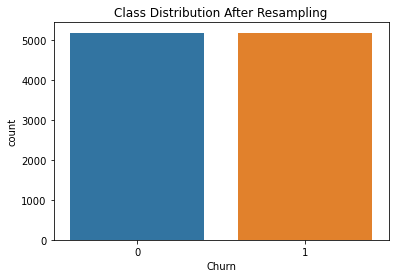

In [53]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [54]:
X_upsampled["Churn"].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) 
y = X_upsampled['Churn'] 

In [56]:
# Dividing dataset into train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### RidgeClassifier

In [57]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [59]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7554964967383426

In [60]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7632850241545893

In [61]:
# RESULT:
# The model achieved 75% accuracy on training set and 76% accuracy on test set.
# The model is not overfitting because accuracies on training and test sets are pretty close.
# 75% accuracy is not very good so we will try to get a better accuracy using a different model


### LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression


In [63]:
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)

C:\Users\Zestkart.in\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
test_prediction=logit_model.predict(X_test)
train_prediction=logit_model.predict(X_train)

In [65]:
print("train accuracy score:",accuracy_score(y_train,train_prediction)*100)

train accuracy score: 75.561729886446


In [66]:
print("test accuracy score:",accuracy_score(y_test,test_prediction)*100)

test accuracy score: 76.13526570048309


In [67]:
confusion_matrix(y_test,test_prediction)

array([[787, 257],
       [237, 789]], dtype=int64)

In [68]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.77      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [69]:
# RESULT:
# The model achieved 75% accuracy on training set and 76% accuracy on test set.
# The model is not overfitting because accuracies on training and test sets are pretty close.
# 75% accuracy is not very good so we will try to get a better accuracy using a different model

## RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [72]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8959893694129016

In [73]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8420289855072464

RESULT:
    The accuracy on training set is 4% higher than the accuracy on test set
    which indicates a slight overfitting.
    However, reducing tree depth may also decrease the accuracy.

GridSearchCV 

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [76]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [77]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.897274792602088

In [78]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [79]:
pred_train = clf.predict(X_train)
accuracy_score(y_train, pred_train)

0.996859144720947

In [80]:
pred_test = clf.predict(X_test)
accuracy_score(y_test, pred_test)

0.9971014492753624

In [81]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.897274792602088

We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator. In the previous random forest, the mean score was approximately 86% (88% on training and 84% on test). Using GridSearchCV, we improved the model accuracy by 4%.